# Importing necessary libraries

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("hr_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Labeling

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
li=['Attrition','BusinessTravel','Department','Gender','EducationField','MaritalStatus','OverTime']
for i in li:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
all_features = list(df.columns)

### Data splitting

In [13]:
X=df.drop(["Attrition","JobRole","Over18",'StockOptionLevel','TotalWorkingYears','EmployeeNumber'],axis='columns')
y=df["Attrition"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20) 
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)


## Predictions

### 2. Logistic regression

In [39]:
#scalling value
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=10000, solver='liblinear') 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of solver {accuracy*100}%')

Accuracy of solver 80.95238095238095%


### 4.Ensembble method

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm = SVC(probability=True,kernel='linear')
rf = RandomForestClassifier(n_estimators=200)
lr = LogisticRegression(max_iter=10000)

ensemble_model = VotingClassifier(estimators=[('svm', svm), ('rf', rf), ('lr', lr)], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy*100:.2f}%")


Ensemble Model Accuracy: 86.05%


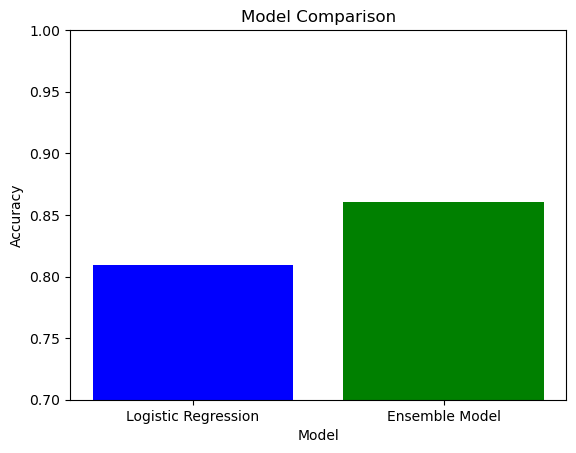

In [ ]:
import matplotlib.pyplot as plt

lr_accuracy = 0.8095
ensemble_accuracy = 0.8605

models = ['Logistic Regression', 'Ensemble Model']
accuracies = [lr_accuracy, ensemble_accuracy]

# Create the bar plot
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.7, 1.0)
plt.show()